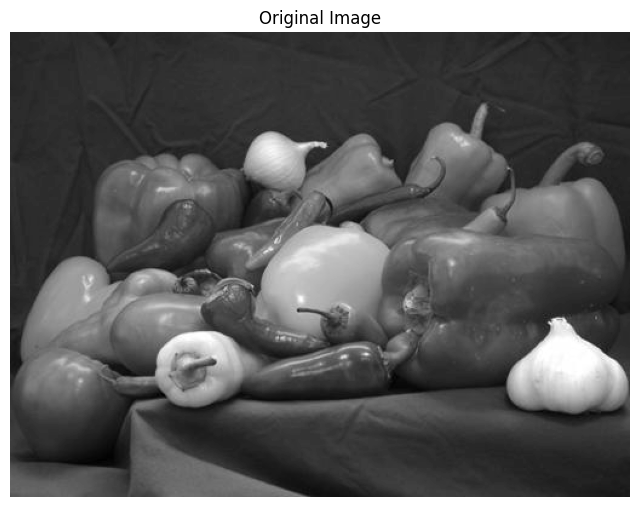

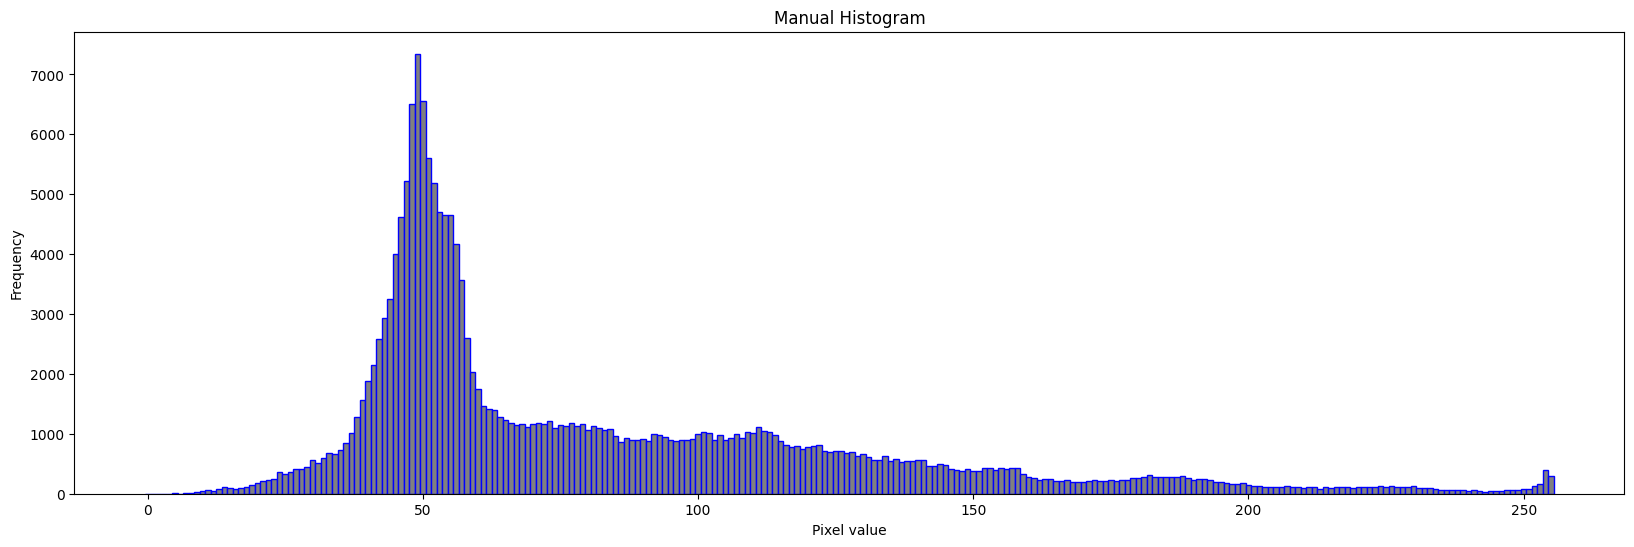

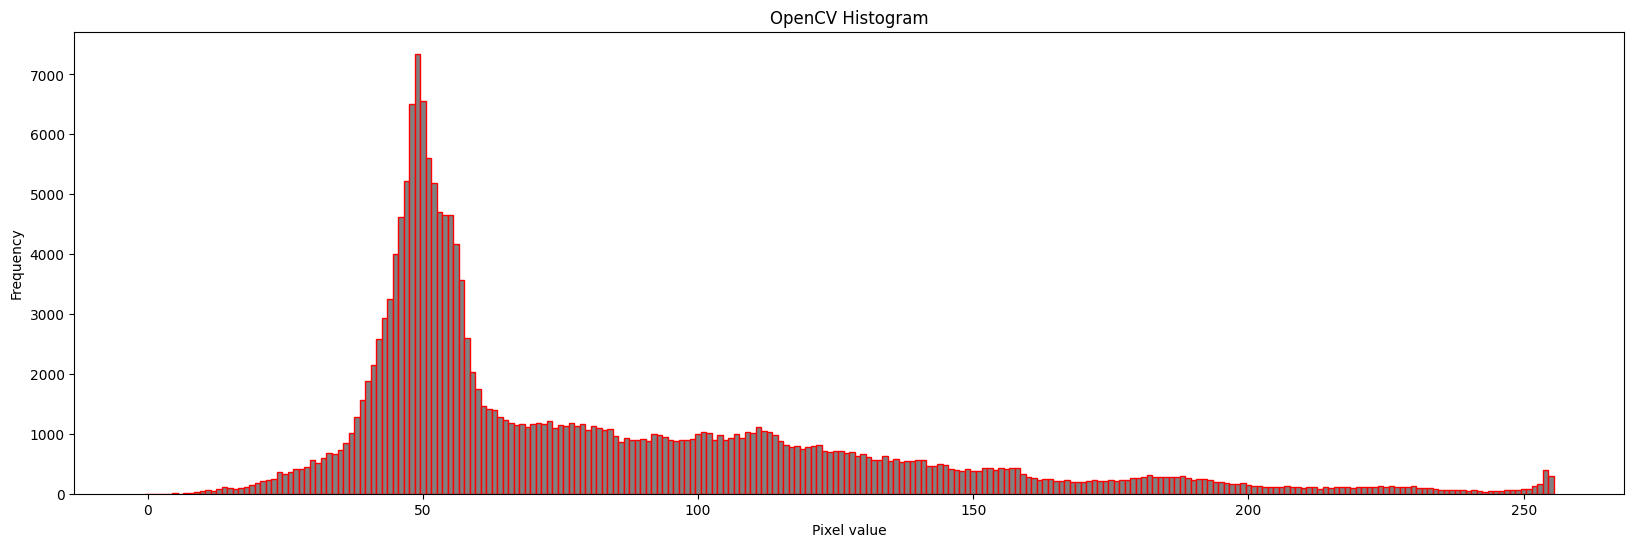

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('image/test.jpg', cv2.IMREAD_GRAYSCALE)

# Manually count pixel values
histogram_manual = np.zeros(256, dtype=int)
for pixel in image.flatten():
    histogram_manual[pixel] += 1

# Calculate histogram using OpenCV function
histogram_cv = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()

# Display the original image
plt.figure(figsize=(8, 8))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Display the manual histogram
plt.figure(figsize=(20, 6))  # Make the figure wider
plt.title("Manual Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.bar(range(256), histogram_manual, width=1, edgecolor='blue', align='center', color='gray')
plt.show()

# Display the OpenCV histogram
plt.figure(figsize=(20, 6))  # Make the figure wider
plt.title("OpenCV Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.bar(range(256), histogram_cv, width=1, edgecolor='red', align='center', color='gray')
plt.show()

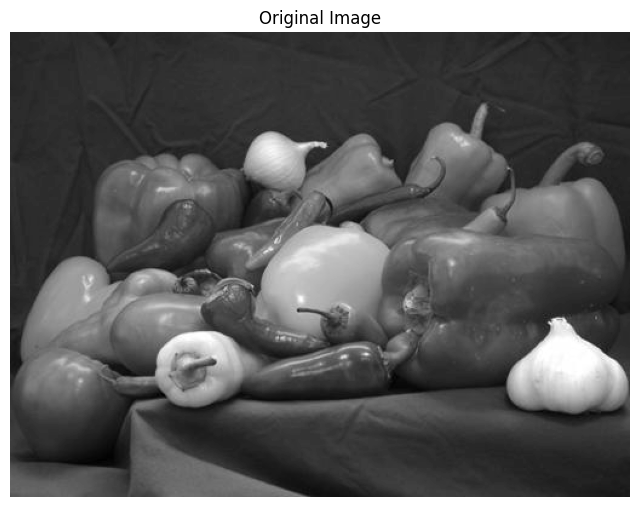

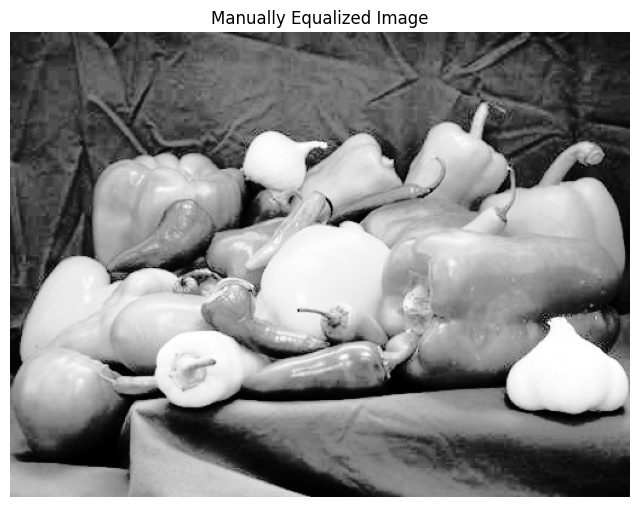

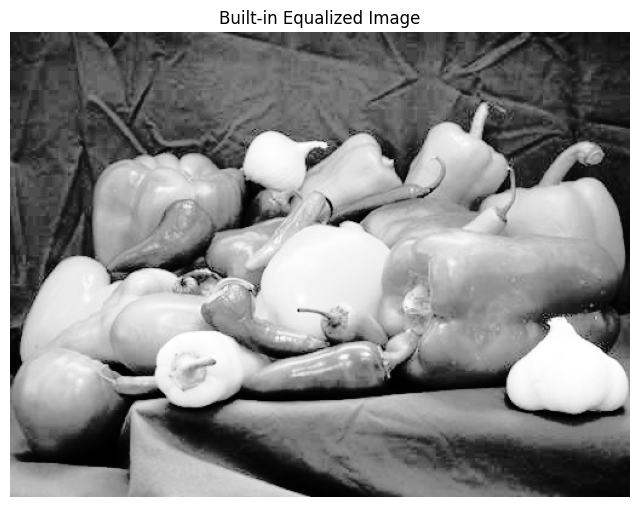

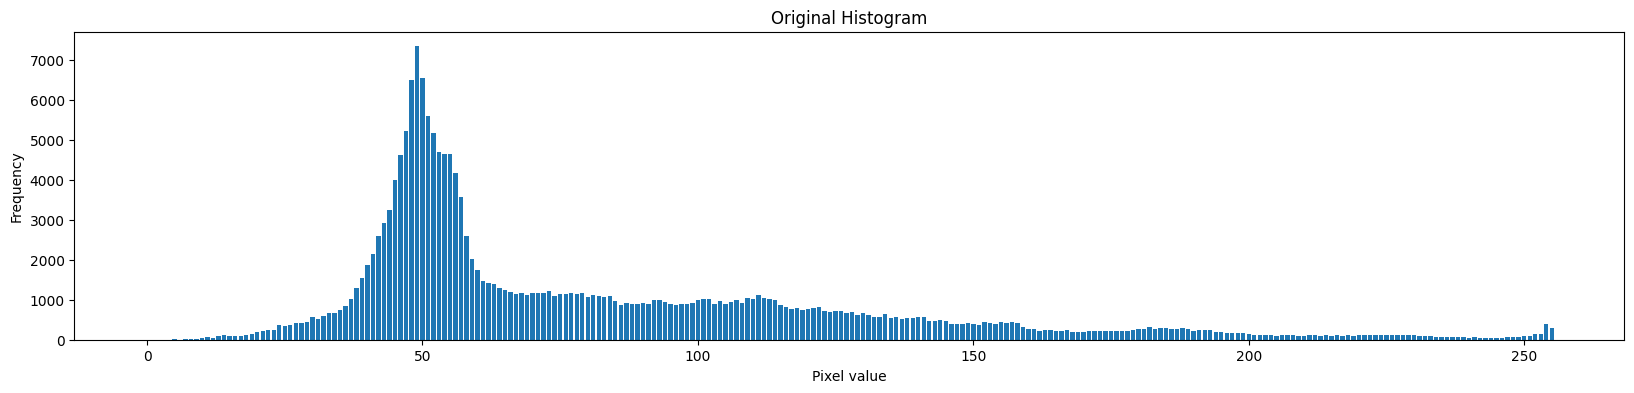

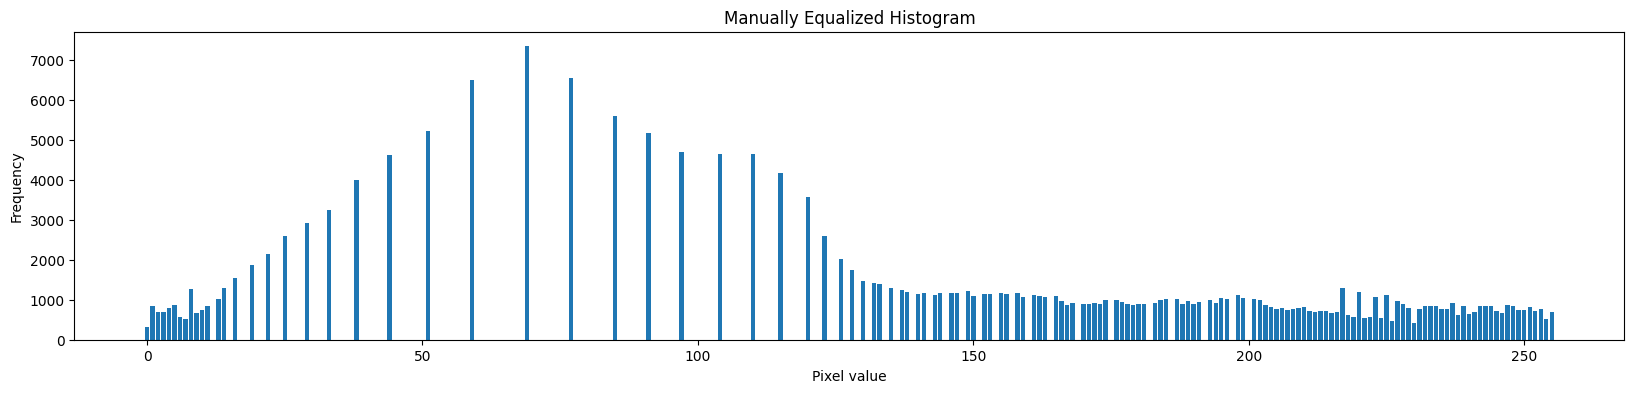

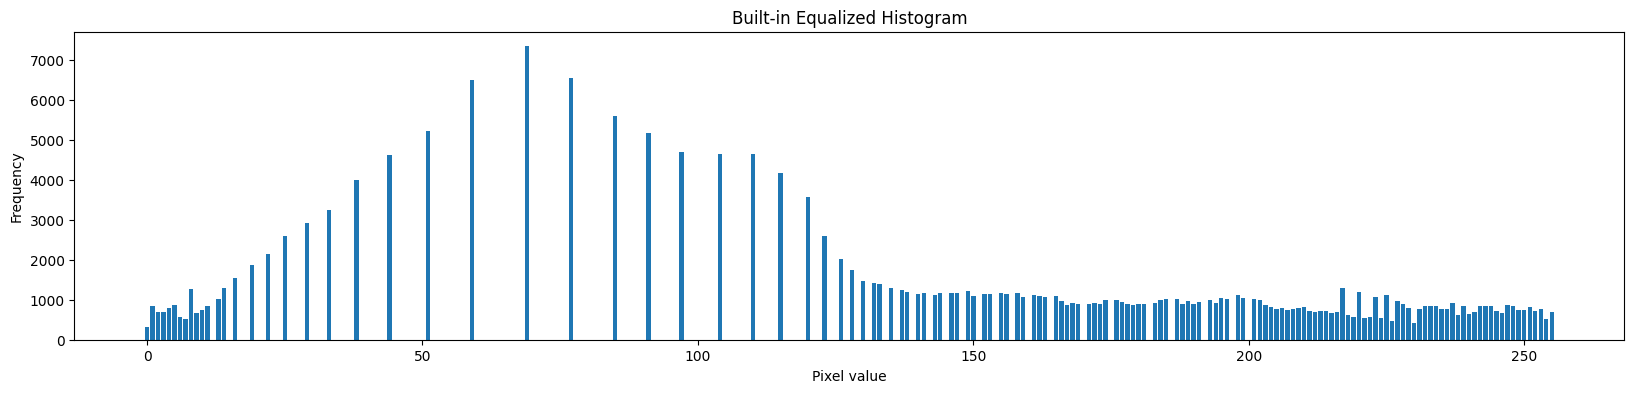

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def manual_histogram_equalization(image):
    # Manually count pixel values
    histogram = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        histogram[pixel] += 1

    # Calculate cumulative distribution function (CDF)
    cdf = np.cumsum(histogram)
    cdf_normalized = cdf * histogram.max() / cdf.max()

    # Normalize the CDF to create the lookup table
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    lut = np.round((cdf - cdf_min) * 255 / (cdf_max - cdf_min)).astype('uint8')

    # Apply the lookup table to get the equalized image
    equalized_image = lut[image]

    return equalized_image, histogram

def display_histogram(image, title, color='gray', edgecolor='black'):
    histogram = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        histogram[pixel] += 1

    plt.figure(figsize=(20, 4))
    plt.title(title)
    plt.xlabel("Pixel value")
    plt.ylabel("Frequency")
    plt.bar(range(256), histogram)
    plt.show()

# Perform manual histogram equalization
equalized_image_manual, original_histogram = manual_histogram_equalization(image)

# Perform built-in histogram equalization
equalized_image_builtin = cv2.equalizeHist(image)

# Display the original, manually equalized, and built-in equalized images
plt.figure(figsize=(8, 8))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 8))
plt.title("Manually Equalized Image")
plt.imshow(equalized_image_manual, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 8))
plt.title("Built-in Equalized Image")
plt.imshow(equalized_image_builtin, cmap='gray')
plt.axis('off')
plt.show()

# Display the histograms
display_histogram(image,"Original Histogram", edgecolor='blue')
display_histogram(equalized_image_manual, "Manually Equalized Histogram", edgecolor='green')
display_histogram(equalized_image_builtin, "Built-in Equalized Histogram", edgecolor='red')